# **Challenges**

1) Best selling books <br>
2) Visualize order status frequency <br>
3) Find a correlation between date and time with order status <br>
4) Find the correlation between city and order status

In [36]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [37]:
# Load Dataset, and show first five rows of it
dataset = pd.read_csv('GP Orders - 5.csv')
dataset.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 15:03,faisalabad,NaN,2,200.0
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0


In [38]:
# checking total number of rows and columns in the dataset
dataset.shape

(19239, 8)

As shown above, the dataset contains 19239 rows and 8 columns in total

In [39]:
# Print information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 8 columns):
Order Number            19239 non-null int64
Order Status            19239 non-null object
Book Name               19237 non-null object
Order Date & Time       19239 non-null object
City                    19238 non-null object
Payment Method          19229 non-null object
Total items             19239 non-null int64
Total weight (grams)    19239 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [40]:
# Prints statistical summary
dataset.describe()

,Order Number,Total items,Total weight (grams)
count,19239.000000,19239.000000,19239.000000
mean,52535.780238,6.051874,363.749675
std,15835.761148,576.938452,834.097325
min,307.000000,0.000000,200.000000
25%,48064.500000,1.000000,200.000000
50%,56436.000000,1.000000,200.000000
75%,63779.500000,1.000000,500.000000
max,71420.000000,80022.000000,55000.000000


In [41]:
# Unique values for each column
dataset.nunique()

Order Number            19239
Order Status                3
Book Name                3525
Order Date & Time       18100
City                     4163
Payment Method              5
Total items                51
Total weight (grams)       63
dtype: int64

In [42]:
# Checking null values
dataset.isnull().sum()

Order Number             0
Order Status             0
Book Name                2
Order Date & Time        0
City                     1
Payment Method          10
Total items              0
Total weight (grams)     0
dtype: int64

The 'Book Name' contains 2 null, so it can be replaced with the best seller book in the list. The 'City' contains 1 null, so, again it will be replaced with the city name of highest count number. And the 'Payment Method' which contains 10 nulls will also be replaced by the payment method mostly used.

In [43]:
# The count for each book
dataset['Book Name'].value_counts()

انٹرنیٹ سے پیسہ کمائیں                                                                                                                                                                                                                                                                                                                                                              2579
Python Programming                                                                                                                                                                                                                                                                                                                                                                  1540
Blockchain, Cryptocurrency And Bitcoin                                                                                                                                                                                                                

In [44]:
# Pick the best selling book and replace null values with it

best_book = dataset['Book Name'].value_counts().index[0]

dataset['Book Name'] = dataset['Book Name'].fillna(best_book)

In [45]:
# Find the count for each city

dataset['City'].value_counts()

Karachi                                          2332
Lahore                                           1993
Islamabad                                         859
Rawalpindi                                        645
Faisalabad                                        478
Multan                                            427
Peshawar                                          427
Gujranwala                                        262
karachi                                           253
Hyderabad                                         240
Quetta                                            223
Sialkot                                           202
Bahawalpur                                        167
Sargodha                                          123
lahore                                            112
Gujrat                                            102
Sahiwal                                            97
Abbottabad                                         95
KARACHI                     

In [46]:
# Pick the city used most frequently, and replace null values with it

best_city = dataset['City'].value_counts().index[0]

dataset['City'] = dataset['City'].fillna(best_city)

In [47]:
# Find count for each payment method

dataset['Payment Method'].value_counts()

Cash on delivery          17470
EasyPaisa                   697
JazzCash                    596
BankTransfer                459
Cash on Delivery (COD)        7
Name: Payment Method, dtype: int64

In the 'Payment Method' there are two values 'Cash on delivery' and 'Cash on Delivery (COD)' which are same. So, we will combine these two values into one value 'Cash on Delivery'.

In [48]:
# Combine 'Cash on delivery' and 'Cash on Delivery (COD)' as 'Cash on Delivery'
dataset['Payment Method'].replace({'Cash on delivery': 'Cash on Delivery', 'Cash on Delivery (COD)': 'Cash on Delivery'}, inplace=True)

In [49]:
# Pick the payment method used most frequently, and replace null values with it

best_method = dataset['Payment Method'].value_counts().index[0]
best_method
dataset['Payment Method'] = dataset['Payment Method'].fillna(best_method)

In [50]:
# Nowh check if null value exist or not
dataset.isnull().sum()

Order Number            0
Order Status            0
Book Name               0
Order Date & Time       0
City                    0
Payment Method          0
Total items             0
Total weight (grams)    0
dtype: int64

# 1) Top 10 best selling books

In [51]:
# Show top 10 books
best_book = dataset['Book Name'].value_counts()[0:10]
best_book

انٹرنیٹ سے پیسہ کمائیں                    2581
Python Programming                        1540
Blockchain, Cryptocurrency And Bitcoin    1067
Product Management                        1041
Artificial Intelligence                    900
Justju ka safar-1                          881
ڈیٹا سائنس ۔ ایک تعارف                     495
Lucky Draw - Free Book                     487
Molo Masali                                422
Column Nigari Kese Sekhain                 418
Name: Book Name, dtype: int64

Text(0, 0.5, 'Each book frequency')

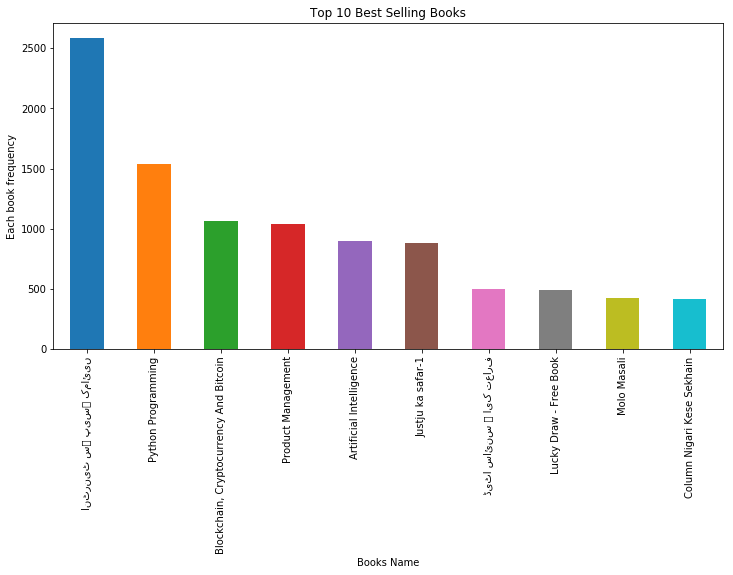

In [52]:
# Show top 10 books with Matplotlib
plt.figure(figsize=(12,6))

best_book.plot(kind='bar', title='Top 10 Best Selling Books')

plt.xlabel('Books Name')
plt.ylabel('Each book frequency')

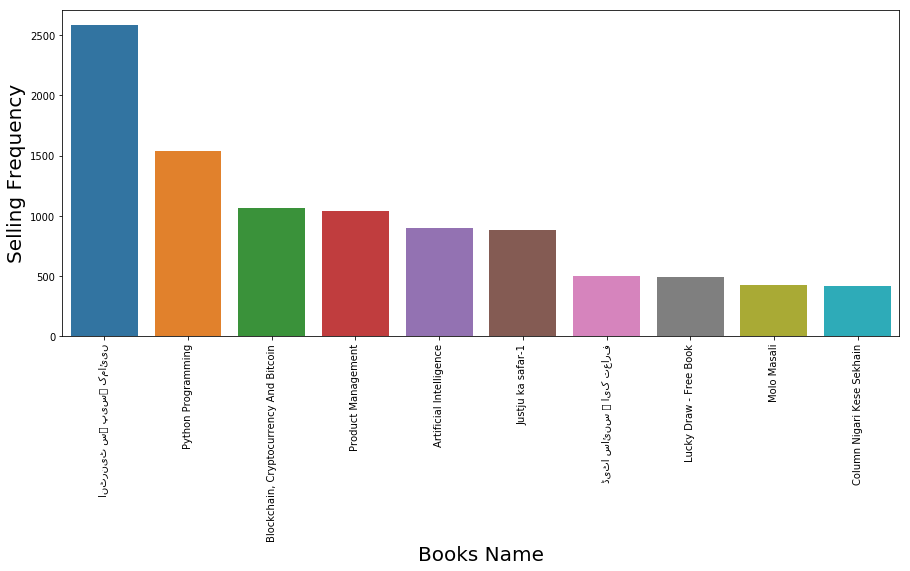

In [53]:
# Show the top 10 books with Searborn
fig, ax = plt.subplots()
ax = sns.barplot(x=best_book.index,y=best_book.values)
ax.set_xlabel('Books Name', fontsize=20)
ax.set_ylabel('Selling Frequency', fontsize=20)
ax.set_xticklabels(best_book.index, rotation='vertical', fontsize=10)
fig.set_size_inches([15,6])
plt.show()

# 2) Visualize order status frequency

In [54]:
# Show the first five rows
dataset.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 15:03,faisalabad,Cash on Delivery,2,200.0
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery,1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery,2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery,1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery,1,200.0


In [55]:
# Check each order status and their frequency
orders = dataset['Order Status'].value_counts()
orders

Completed    17948
Returned      1142
Cancelled      149
Name: Order Status, dtype: int64

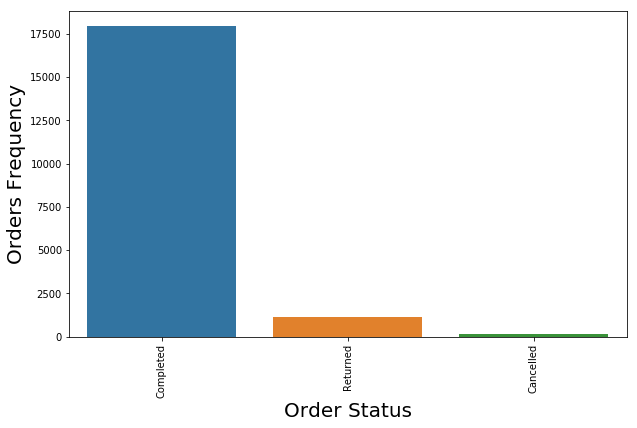

In [56]:
# Show the order status with bar chart
fig, ax = plt.subplots()
ax = sns.barplot(x=orders.index,y=orders.values)
ax.set_xlabel('Order Status', fontsize=20)
ax.set_ylabel('Orders Frequency', fontsize=20)
ax.set_xticklabels(orders.index, rotation='vertical', fontsize=10)
fig.set_size_inches([10,6])
plt.show()

# 3) Find a correlation between date and time with order status

In [57]:
# Pick the year from 'Order Date & Time' field, and find the orders in each year
year = pd.DatetimeIndex(dataset['Order Date & Time']).year.value_counts()
year


2020    16108
2021     2679
2019      452
Name: Order Date & Time, dtype: int64

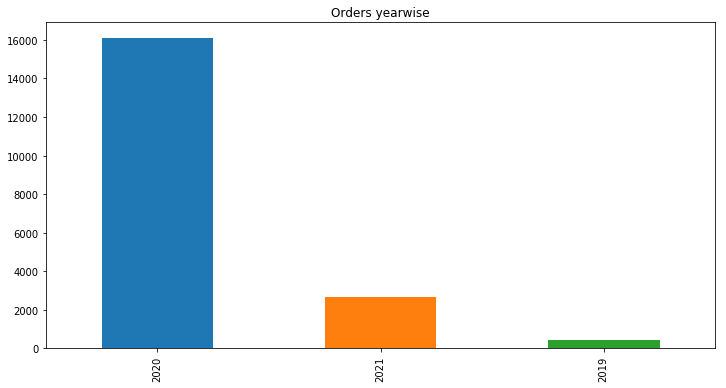

In [58]:
# Show the orders yearswise
plt.figure(figsize=(12,6))
year.plot(kind="bar", title="Orders yearwise")

In [59]:
# Orders count for each day
days = pd.DatetimeIndex(dataset['Order Date & Time']).day_name().value_counts()
days

Saturday     4270
Sunday       3651
Friday       2911
Monday       2454
Tuesday      2043
Wednesday    1968
Thursday     1942
Name: Order Date & Time, dtype: int64

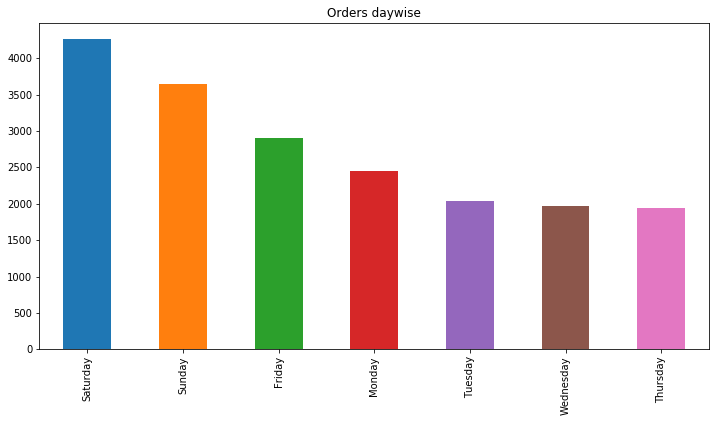

In [60]:
# Visulize the orders count for each day
plt.figure(figsize=(12,6))
days.plot(kind="bar", title="Orders daywise")


Maximum number of orders are on the weekends

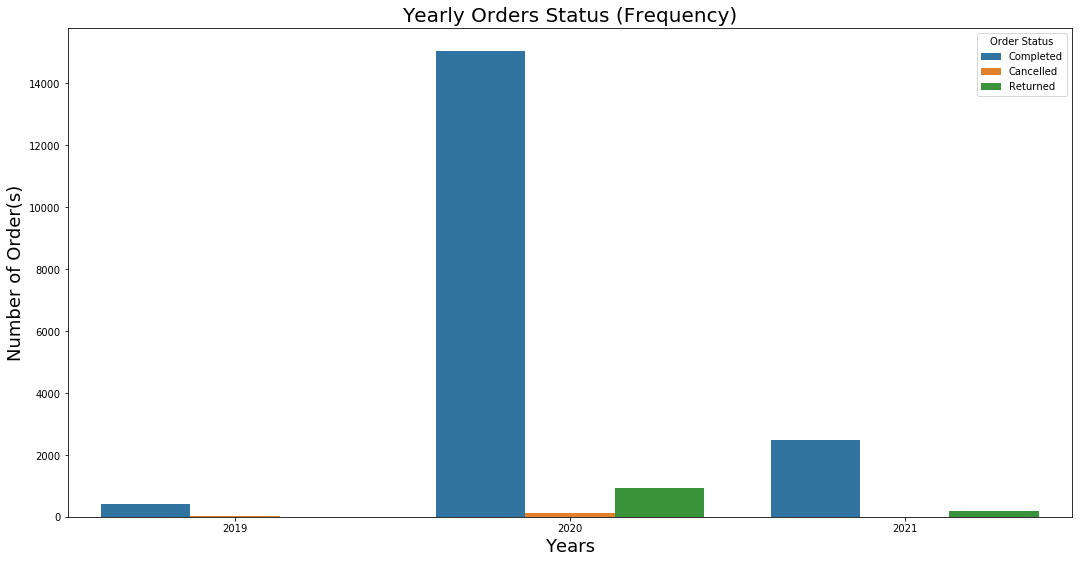

In [61]:
# Show the order status (Completed, Cancelled, Returned) yearwise
fig, ax = plt.subplots()
ax=sns.countplot(x=pd.DatetimeIndex(dataset['Order Date & Time']).year,data=dataset,hue="Order Status")
fig.set_size_inches(18,9)
ax.set_title('Yearly Orders Status (Frequency)',fontsize=20)
ax.set_xlabel("Years",fontsize=18)
ax.set_ylabel("Number of Order(s)",fontsize=18) 
# plt.xticks(rotation=90)
plt.show()

# 4) Find the corelation between city and order status

In [62]:
# Completed orders citywise
com = dataset[dataset['Order Status'] == 'Completed']
com['City'].value_counts()

Karachi                                                           2243
Lahore                                                            1911
Islamabad                                                          816
Rawalpindi                                                         616
Faisalabad                                                         454
Multan                                                             399
Peshawar                                                           396
Gujranwala                                                         245
karachi                                                            227
Hyderabad                                                          216
Quetta                                                             210
Sialkot                                                            195
Bahawalpur                                                         159
Sargodha                                                           117
lahore

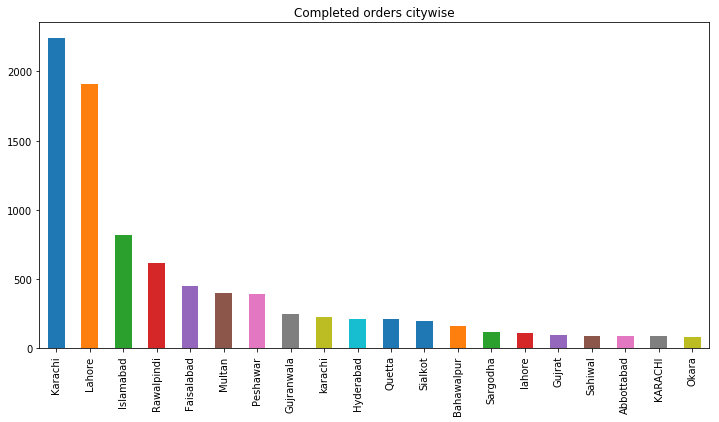

In [63]:
# Plot of first 20 cities (completed orders)
comp = com['City'].value_counts()[0:20]
plt.figure(figsize=(12,6))
comp.plot(kind='bar', title='Completed orders citywise')

In [64]:
# Cancelled orders citywise
canc = dataset[dataset['Order Status'] == 'Cancelled']
canc['City'].value_counts()

Karachi                       16
Lahore                        11
Peshawar                       6
karachi                        5
Faisalabad                     4
Rawalpindi                     4
Islamabad                      4
Abu Dhabi                      3
Bahawalpur                     3
Multan                         3
Ameen town                     2
Gujranwala                     2
Okara                          2
Pasrur                         2
Farwaniya                      2
Janu k khela swat              2
Bahawalnagar                   2
test                           2
Taunsa                         2
Sillan Wali road sargodha.     1
Korangi twon                   1
Abdurahmanzi                   1
Alipur chattha                 1
islamabad                      1
Khanpur                        1
multan                         1
خان پور                        1
Quetta                         1
Khushab                        1
Arifwala                       1
          

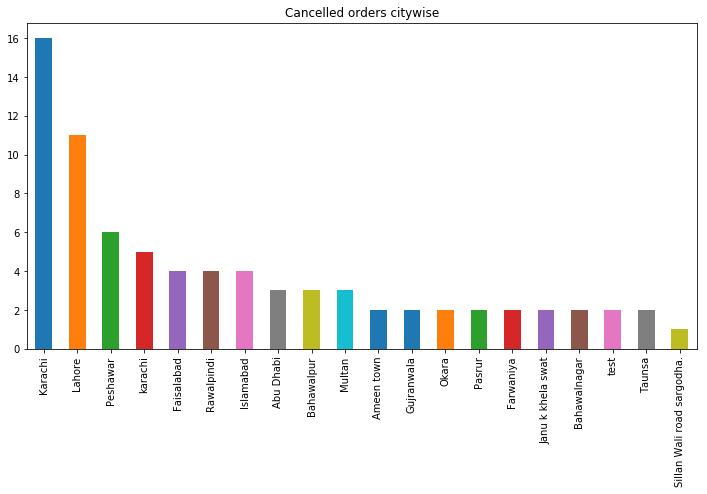

In [65]:
# Plot of first 20 cities (cancelled orders)
canc = canc['City'].value_counts()[0:20]
plt.figure(figsize=(12,6))
canc.plot(kind='bar', title='Cancelled orders citywise')

In [66]:
# Returned orders citywise
retr = dataset[dataset['Order Status'] == 'Returned']
retr['City'].value_counts()

Karachi                             74
Lahore                              71
Islamabad                           39
Peshawar                            25
Rawalpindi                          25
Multan                              25
Hyderabad                           24
karachi                             21
Faisalabad                          20
Gujranwala                          15
Quetta                              12
Vehari                               9
London                               8
Town                                 7
Sialkot                              7
Haripur KP                           6
Lakki marwat                         6
talagang                             6
Sargodha                             6
KARACHI                              6
Gujrat                               6
Layyah                               6
Abbottabad                           5
Kasur                                5
Oakville                             5
Loralai District         

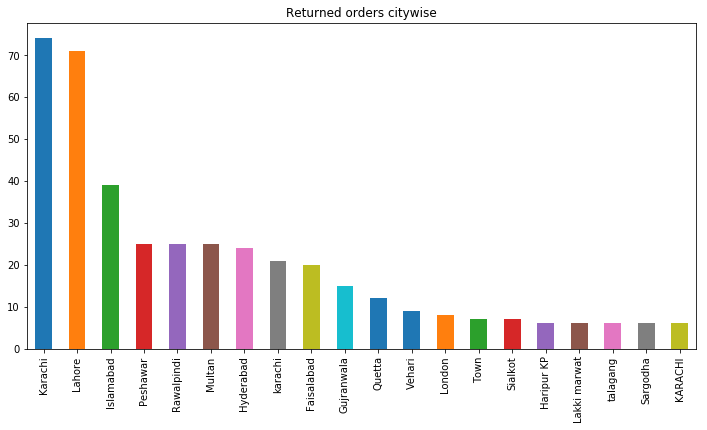

In [67]:
# Plot of first 20 cities (returned orders)
retr = retr['City'].value_counts()[0:20]
plt.figure(figsize=(12,6))
retr.plot(kind='bar', title='Returned orders citywise')

# Citywise orders completion percentage (%)

In [68]:
# First 20 Cities order completion percentage
orders = dataset['City'].value_counts()[0:20]
completed = dataset[dataset['Order Status'] == 'Completed']
completed = completed['City'].value_counts()[0:20]
percent= []
for i in range(20):
    percent.append((completed[i] * 100) / orders[i])

In [69]:
# orders completion percentage for each city
percent

[96.14230604372054,
 95.88559959859508,
 94.9941792782305,
 95.50387596899225,
 94.97907949790795,
 93.44262295081967,
 92.7400468384075,
 93.5114503816794,
 89.72332015810277,
 90.0,
 94.17040358744394,
 96.53465346534654,
 95.20958083832335,
 95.1219512195122,
 97.32142857142857,
 94.11764705882354,
 95.87628865979381,
 94.73684210526316,
 93.61702127659575,
 93.4065934065934]

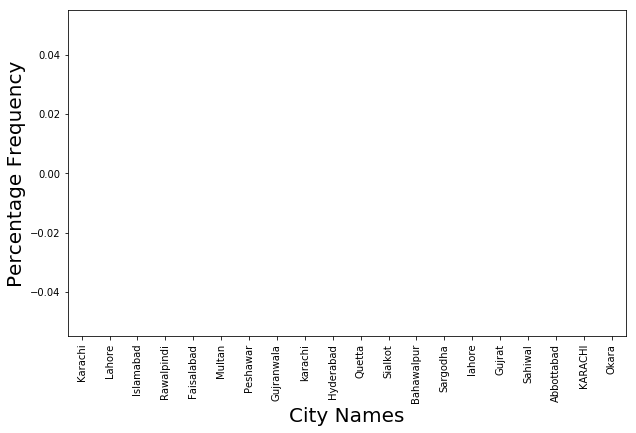

In [70]:
fig, ax = plt.subplots()
ax = sns.barplot(x=completed,y=percent)
ax.set_xlabel('City Names', fontsize=20)
ax.set_ylabel('Percentage Frequency', fontsize=20)
ax.set_xticklabels(orders.index, rotation='vertical', fontsize=10)
fig.set_size_inches([10,6])
plt.show()

# In Progress